In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
import os

In [2]:
!pip install imblearn

In [3]:
# from imblearn.over_sampling import SMOTE

In [4]:
filename = "audio.wav"

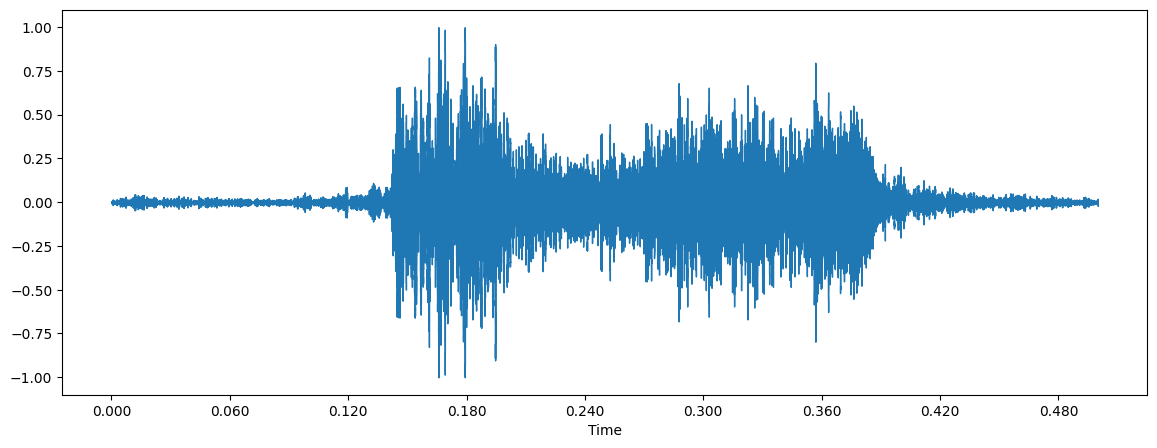

In [5]:
plt.figure(figsize=(14,5))
librosa_data, sample_rate = librosa.load(filename)
librosa.display.waveshow(librosa_data, sr = sample_rate)
ipd.Audio(filename)

In [6]:
librosa_data

array([-0.00500488, -0.00579834, -0.0012207 , ...,  0.00939941,
        0.01828003,  0.01885986], dtype=float32)

In [7]:
sample_rate

22050

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)

In [9]:
wave_sample_rate

22050

# Reading the CSV File 

In [10]:
metadata = pd.read_csv('New_Solicited.csv')

In [11]:
metadata.head(10)

,participant,filename,sound_prediction_score,tb_status
0,CODA_TB_0001,1645088710003-recording-1.wav,0.990254,0
1,CODA_TB_0001,1645088760390-recording-1.wav,0.990272,0
2,CODA_TB_0001,1645088760830-recording-1.wav,0.990112,0
3,CODA_TB_0001,1645088710843-recording-1.wav,0.990152,0
4,CODA_TB_0001,1645088759950-recording-1.wav,0.990039,0
5,CODA_TB_0001,1645088758630-recording-1.wav,0.990004,0
6,CODA_TB_0001,1645088758230-recording-1.wav,0.975063,0
7,CODA_TB_0001,1645088738844-recording-1.wav,0.990068,0
8,CODA_TB_0001,1645088784942-recording-1.wav,0.990291,0
9,CODA_TB_0001,1645088784542-recording-1.wav,0.990288,0


In [12]:
metadata['tb_status'].value_counts()

tb_status
0    13635
1    11769
Name: count, dtype: int64

In [13]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25404 entries, 0 to 25403
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   participant             25404 non-null  object 
 1   filename                25404 non-null  object 
 2   sound_prediction_score  19520 non-null  float64
 3   tb_status               25404 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 794.0+ KB


# Feature Extraction (MFCC)

In [14]:
mfccs = librosa.feature.mfcc(y = librosa_data, sr = sample_rate, n_mfcc = 40)
print(mfccs)

[[-2.95426300e+02 -2.65056366e+02 -2.76765961e+02 -2.78187897e+02
  -2.56061279e+02 -1.71780548e+02 -2.26484985e+01  3.91569862e+01
   3.63577728e+01 -1.37773827e-01 -3.47202797e+01 -3.48578072e+01
  -2.46206150e+01 -2.04552040e+01 -2.84029884e+01 -4.29482193e+01
  -7.28398972e+01 -1.18997688e+02 -1.64260223e+02 -2.07397125e+02
  -2.51061249e+02 -2.91912537e+02]
 [ 1.16886993e+02  1.17746445e+02  1.15355804e+02  1.05069016e+02
   1.05670853e+02  1.14309082e+02  1.01168114e+02  8.94032745e+01
   8.22566681e+01  6.82553406e+01  5.83635406e+01  4.68605652e+01
   4.71245842e+01  4.81588593e+01  4.70361023e+01  5.41889114e+01
   6.43056717e+01  7.09846878e+01  7.96007462e+01  9.14943237e+01
   1.06757111e+02  1.13995804e+02]
 [-1.05313444e+01 -9.25915909e+00 -7.20612335e+00 -5.56331539e+00
  -7.43919325e+00 -1.12599659e+01 -6.04505825e+00 -1.99784994e+00
  -1.84117246e+00 -6.76442719e+00 -1.45099850e+01 -2.55005074e+01
  -2.57713394e+01 -2.81969757e+01 -3.63372116e+01 -4.21670151e+01
  -3.8

In [15]:
# sm = SMOTE(random_state = 2)

# Feature Extraction of all Audio Files

In [16]:
audio_dataset_path = 'New_Solicited/'

In [17]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type = "kaiser_fast")
    mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)
    
    return mfccs_scaled_features

In [18]:
from tqdm import tqdm

extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), str(row['filename']))
    final_class_labels = row['tb_status']
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

25404it [03:11, 132.42it/s]


In [19]:
extracted_features_df = pd.DataFrame(extracted_features, columns = ['feature', 'tb_status'])
extracted_features_df.head()

,feature,tb_status
0,"[-230.26958, 55.229088, 18.09721, 23.250128, 7...",0
1,"[-184.86603, 37.76582, 28.982641, 8.471783, -2...",0
2,"[-209.29927, 22.282017, 30.590296, 3.3967605, ...",0
3,"[-328.00003, 73.08393, -17.045286, 71.57053, -...",0
4,"[-212.0001, 53.546017, 30.95828, -4.778516, 2....",0


In [23]:
# jsondata = extracted_features_df.to_json()
# print(jsondata)

In [24]:
# import json
# file =  open("features.json", 'w')
# file.write(jsondata)

In [25]:
# jfile = open("features.json", 'r')
# data = json.load(jfile)
# df = pd.DataFrame.from_dict(dict)

In [26]:
# df.head()

In [27]:
extracted_features_df['feature'][0].size

40

In [28]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['tb_status'].tolist())

In [29]:
X.shape

(25404, 40)

In [30]:
y.shape

(25404,)

In [31]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(y, num_classes = 10)

In [32]:
y.shape

(25404, 10)

In [33]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
print(X_train.shape, " ", X_test.shape)
print(y_train.shape, " ", y_test.shape)

(20323, 40)   (5081, 40)
(20323, 10)   (5081, 10)


In [36]:
X_train = X_train.reshape(X_train.shape[0], 8, 5, 1)
X_test = X_test.reshape(X_test.shape[0], 8, 5, 1)
print(X_train.shape, " ", X_test.shape)

(20323, 8, 5, 1)   (5081, 8, 5, 1)


In [37]:
input_dim = (8, 5, 1)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical 

In [39]:
# model = Sequential()

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(16, 8, 1)))
# model.add(MaxPooling2D((1, 1)))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((1, 1)))

# model.add(Conv2D(128, (2, 2), activation='relu'))
# model.add(MaxPooling2D((1, 1)))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))

# model.add(Dropout(0.2))
# model.add(Dense(10, activation='softmax'))

In [40]:
model = Sequential()

model.add(Conv2D(32, (2, 2), activation='relu', input_shape = input_dim))
model.add(MaxPooling2D((1, 1)))

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D((1, 1)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(MaxPooling2D((1, 1)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 4, 32)          160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 4, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 3, 64)          8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 3, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 3, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 2, 128)         3

In [42]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [53]:
# Training the model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 20
num_batch_size = 32

# checkpointer = ModelCheckpoint(filepath = 'saved_models/audio_classification.hdf5',
#                                verbose=1, save_best_only = True)

checkpointer = ModelCheckpoint(filepath = 'saved_model/cnnmodel',
                               verbose=1, save_best_only = True)
 
start = datetime.now()

# model.fit(X_train, y_train, batch_size = num_batch_size, epochs = num_epochs, validation_data = (X_test, y_test),  callbacks = [checkpointer], verbose=1)
model.fit(X_train, y_train, batch_size = num_batch_size, epochs = num_epochs, validation_split = 0.1,  callbacks = [checkpointer], verbose=1)



duration = datetime.now() - start

print("Training completed in time : ", duration)

Epoch 1/20
569/572 [============================>.] - ETA: 0s - loss: 0.0560 - accuracy: 0.9817
Epoch 1: val_loss improved from inf to 0.08520, saving model to saved_model\cnnmodel


INFO:tensorflow:Assets written to: saved_model\cnnmodel\assets


INFO:tensorflow:Assets written to: saved_model\cnnmodel\assets


572/572 [==============================] - 7s 13ms/step - loss: 0.0561 - accuracy: 0.9817 - val_loss: 0.0852 - val_accuracy: 0.9729
Epoch 2/20
570/572 [============================>.] - ETA: 0s - loss: 0.0445 - accuracy: 0.9846
Epoch 2: val_loss did not improve from 0.08520
572/572 [==============================] - 6s 11ms/step - loss: 0.0444 - accuracy: 0.9846 - val_loss: 0.0870 - val_accuracy: 0.9764
Epoch 3/20
571/572 [============================>.] - ETA: 0s - loss: 0.0549 - accuracy: 0.9825
Epoch 3: val_loss did not improve from 0.08520
572/572 [==============================] - 7s 11ms/step - loss: 0.0550 - accuracy: 0.9824 - val_loss: 0.0865 - val_accuracy: 0.9729
Epoch 4/20
572/572 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9846
Epoch 4: val_loss improved from 0.08520 to 0.08229, saving model to saved_model\cnnmodel


INFO:tensorflow:Assets written to: saved_model\cnnmodel\assets


INFO:tensorflow:Assets written to: saved_model\cnnmodel\assets


572/572 [==============================] - 8s 14ms/step - loss: 0.0434 - accuracy: 0.9846 - val_loss: 0.0823 - val_accuracy: 0.9754
Epoch 5/20
572/572 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9859
Epoch 5: val_loss did not improve from 0.08229
572/572 [==============================] - 7s 12ms/step - loss: 0.0444 - accuracy: 0.9859 - val_loss: 0.0933 - val_accuracy: 0.9744
Epoch 6/20
571/572 [============================>.] - ETA: 0s - loss: 0.0579 - accuracy: 0.9813
Epoch 6: val_loss did not improve from 0.08229
572/572 [==============================] - 7s 11ms/step - loss: 0.0579 - accuracy: 0.9814 - val_loss: 0.0933 - val_accuracy: 0.9715
Epoch 7/20
571/572 [============================>.] - ETA: 0s - loss: 0.0411 - accuracy: 0.9860
Epoch 7: val_loss improved from 0.08229 to 0.07224, saving model to saved_model\cnnmodel


INFO:tensorflow:Assets written to: saved_model\cnnmodel\assets


INFO:tensorflow:Assets written to: saved_model\cnnmodel\assets


572/572 [==============================] - 8s 14ms/step - loss: 0.0411 - accuracy: 0.9860 - val_loss: 0.0722 - val_accuracy: 0.9813
Epoch 8/20
570/572 [============================>.] - ETA: 0s - loss: 0.0407 - accuracy: 0.9867
Epoch 8: val_loss did not improve from 0.07224
572/572 [==============================] - 7s 12ms/step - loss: 0.0406 - accuracy: 0.9867 - val_loss: 0.0953 - val_accuracy: 0.9764
Epoch 9/20
571/572 [============================>.] - ETA: 0s - loss: 0.0481 - accuracy: 0.9838
Epoch 9: val_loss did not improve from 0.07224
572/572 [==============================] - 7s 12ms/step - loss: 0.0481 - accuracy: 0.9838 - val_loss: 0.1003 - val_accuracy: 0.9739
Epoch 10/20
568/572 [============================>.] - ETA: 0s - loss: 0.0521 - accuracy: 0.9820
Epoch 10: val_loss did not improve from 0.07224
572/572 [==============================] - 7s 12ms/step - loss: 0.0519 - accuracy: 0.9820 - val_loss: 0.0880 - val_accuracy: 0.9764
Epoch 11/20
568/572 [====================

In [54]:
# from numba import jit, cuda
# import numpy as np
# from tensorflow.keras.callbacks import ModelCheckpoint
# from datetime import datetime
# # from timeit import default_timer as timer

# @jit(target_backend='cuda')						
# def func():
    
#     # Training the model
#     num_epochs = 15
#     num_batch_size = 32

#     # checkpointer = ModelCheckpoint(filepath = 'saved_models/audio_classification.hdf5',
#     #                                verbose=1, save_best_only = True)

#     checkpointer = ModelCheckpoint(filepath = 'saved_model/cnnmodel',
#                                    verbose=1, save_best_only = True)

#     start = datetime.now()

#     # model.fit(X_train, y_train, batch_size = num_batch_size, epochs = num_epochs, validation_data = (X_test, y_test),  callbacks = [checkpointer], verbose=1)
#     model.fit(X_train, y_train, batch_size = num_batch_size, epochs = num_epochs, validation_split = 0.1,  callbacks = [checkpointer], verbose=1)



#     duration = datetime.now() - start

#     print("Training completed in time : ", duration)

In [55]:
# if __name__=="__main__":
#     func()

In [56]:
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy :",test_accuracy[1] * 100)
print("Loss :",test_accuracy[0] * 100)

Test Accuracy : 97.18559384346008
Loss : 11.894260346889496


In [57]:
test_accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Train Accuracy :",test_accuracy[1] * 100)
print("Loss :",test_accuracy[0] * 100)

Train Accuracy : 99.7195303440094
Loss : 1.4096163213253021


In [ ]:
# filename="testing/p1.wav"
# audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
# mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)
# mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

# print(mfccs_scaled_features)
# mfccs_scaled_features=mfccs_scaled_features.reshape(1, 128, 1, 1)
# print(mfccs_scaled_features)
# print(mfccs_scaled_features.shape)

# predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=-1)
# print(predicted_label)
# prediction_class = labelencoder.inverse_transform(predicted_label) 
# prediction_class

In [ ]:
filename="testing/p16.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
mfccs_scaled_features = np.repeat(mfccs_scaled_features, 1, axis=0)

# print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1, 8, 5, 1)
# print(mfccs_scaled_features)
# print(mfccs_scaled_features.shape)

predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print(predicted_label)
if predicted_label[0] == 1:
    print("TB Positive")
else:
    print("TB Negative")
# labelencoder = LabelEncoder()
# prediction_class = labelencoder.inverse_transform(predicted_label) 
# prediction_class

In [1]:
import librosa
import numpy as np
filename = "testing/p16.wav"

In [2]:
# extracting mfcc features from audio 
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
mfccs_scaled_features = np.repeat(mfccs_scaled_features, 1, axis=0)